In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.model_selection import train_test_split # sci-kit learn library to split train and test data
from sklearn.preprocessing import MinMaxScaler # to rescale the numerical data
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, accuracy_score,
                             classification_report,confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,
                             davies_bouldin_score, silhouette_score, v_measure_score, rand_score)
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn import metrics
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

#plot_roc_curve

C:\Users\USER PC\AppData\Roaming\Python\Python310\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\ProgramData\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\USER PC\AppData\Roaming\Python\Python310\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
C:\ProgramData\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
    df = pd.read_csv('mydata.csv')

In [6]:
#checking for duplicates
duplicates = df[df.duplicated()]

In [7]:
print(duplicates)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [8]:
print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]


In [9]:
df = pd.DataFrame(df)

# Create a one hot encoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['RiskLevel']]).toarray()

# Create a new dataframe with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

result = pd.concat([df, encoded_df], axis=1)

# Display the result
print(result)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

      RiskLevel_high risk  RiskLevel_low risk  RiskLevel_mid risk  
0                  

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [11]:
correlations = result.corr()['SystolicBP']
correlations = correlations.drop('SystolicBP') # drop correlation with itself
print(correlations)

Age                    0.416045
DiastolicBP            0.787006
BS                     0.425172
BodyTemp              -0.286616
HeartRate             -0.023108
RiskLevel_high risk    0.361948
RiskLevel_low risk    -0.325681
RiskLevel_mid risk    -0.001663
Name: SystolicBP, dtype: float64


<Axes: >

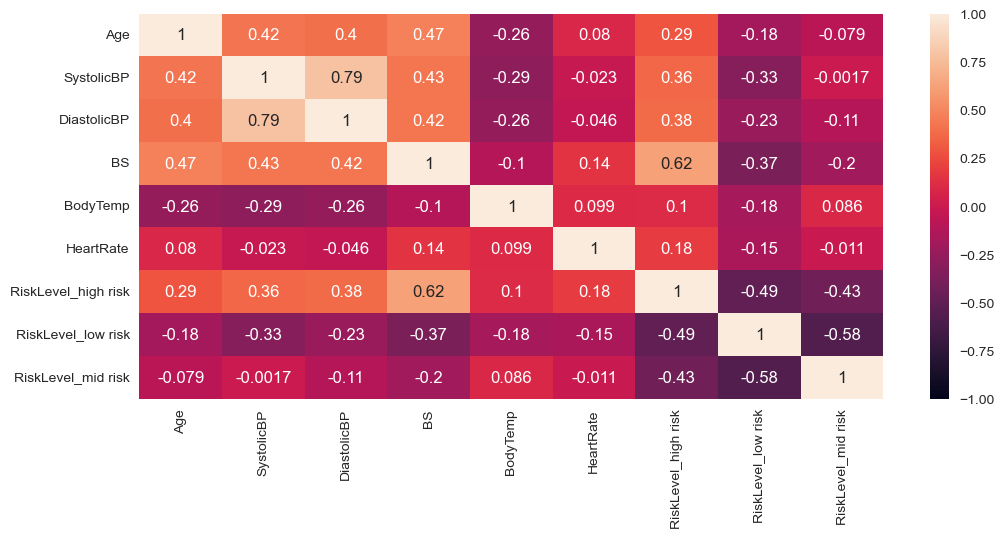

In [12]:
plt.figure(figsize=(12,5))
sns.heatmap(result.corr(), vmin=-1, vmax=1, annot=True)

In [13]:
cleaned_data = result.drop(["BodyTemp","HeartRate","RiskLevel_mid risk","RiskLevel"],axis = 1)

In [14]:
cleaned_data

,Age,SystolicBP,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
0,25,130,80,15.0,1.0,0.0
1,35,140,90,13.0,1.0,0.0
2,29,90,70,8.0,1.0,0.0
3,30,140,85,7.0,1.0,0.0
4,35,120,60,6.1,0.0,1.0
...,...,...,...,...,...,...
1009,22,120,60,15.0,1.0,0.0
1010,55,120,90,18.0,1.0,0.0
1011,35,85,60,19.0,1.0,0.0
1012,43,120,90,18.0,1.0,0.0


In [15]:
X = cleaned_data.drop("SystolicBP",axis = 1)
y = cleaned_data['SystolicBP']

In [16]:
X

,Age,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
0,25,80,15.0,1.0,0.0
1,35,90,13.0,1.0,0.0
2,29,70,8.0,1.0,0.0
3,30,85,7.0,1.0,0.0
4,35,60,6.1,0.0,1.0
...,...,...,...,...,...
1009,22,60,15.0,1.0,0.0
1010,55,90,18.0,1.0,0.0
1011,35,60,19.0,1.0,0.0
1012,43,90,18.0,1.0,0.0


# Question 1

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X, y = X_train, y_train # Splits the train data and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
X_train

,Age,DiastolicBP,BS,RiskLevel_high risk,RiskLevel_low risk
367,35,100,7.80,1.0,0.0
437,29,70,10.00,1.0,0.0
711,30,80,6.90,0.0,0.0
945,22,85,7.50,0.0,1.0
563,17,65,7.50,0.0,1.0
...,...,...,...,...,...
451,48,90,15.00,1.0,0.0
328,35,70,6.90,0.0,1.0
644,25,100,15.00,1.0,0.0
852,23,70,7.01,0.0,0.0


In [19]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [20]:
#converting to pandas dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns)

In [21]:
model = LinearRegression()


In [22]:
#Build and fit the linear model
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)

LinearRegression()

In [74]:
def model_test(lmodel,X_train,y_train,X_test,y_test): # have multiple independent variables 
    lmodel.fit(X_train,y_train)
    y_pred = lmodel.predict(X_test)
    mean_abs = mean_absolute_error(y_test,y_pred)
    mean_squared = mean_squared_error(y_test,y_pred)
    print(f"The mean_absolute_error is: {mean_abs:.2f}")
    print(f"The root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The coefficient of determination is: {r2_score(y_test,y_pred):.2f}")
    
model_test(lmodel,X_train_scaled, y_train, X_test_scaled,y_test)


The mean_absolute_error is: 8.55
The root mean squared error is : 10.68
The coefficient of determination is: 0.65


# Question 2

# Selecting the correlation variable to use for the PCA

In [79]:
# Creating a function to build a linear regression model
def linear_model(features, target):
    # checking for the shape of features to ensure it is not 1.D
    if len(features.shape) == 1:
        features = features.to_numpy().reshape(-1,1)
    else: 
        pass
    # Creating a train-test split for the model
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 50)
    
    # scaling the features
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Building the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    r2score = r2_score(y_test, y_pred)
    
    return (f'Mean absolute error is: {mean_abs:.2f}', f'Root mean squared error: {np.sqrt(mean_squared):.2f}', 
            f'coefficient of determination is: {r2score:.2f}')

In [56]:
X = result.drop(["SystolicBP","RiskLevel"],axis = 1)
y = result['SystolicBP']

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

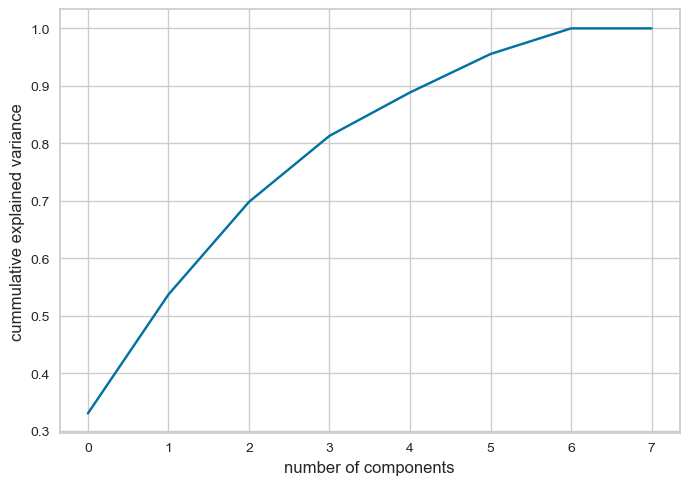

In [60]:
_pca = PCA()  # reduce to 3 components
_pca.fit(X_scaled)

#X_test_pca = pca.fit_transform(X_test_scaled)

plt.plot(np.cumsum(_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')
plt.show()

In [25]:
# creating a fucntion to perform pca analysis on dataset and build a linear regression model with it
def pca_model(features,target,n):
    # creating a try and except block to handle incorrect no of compoments specified
    try:
        features = StandardScaler().fit_transform(features)
        pca = PCA(n_components=n)       # specify the number of principled components
        x_pca = pca.fit_transform(features)    # fit the model and transform the data to their new shape
        
        # per new dimension, see what % of variation in the dataset it accounts for...
        percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
    
        return (f"percent_variance = {percent_variance}", linear_model(x_pca, target))
    
    except:
        n+=1
        features = StandardScaler().fit_transform(features)
        pca = PCA(n_components=n)
        x_pca = pca.fit_transform(features)    
    
        # per new dimension, see what % of variation in the dataset it accounts for...
        percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
        
        return (f"percent_variance = {percent_variance}", linear_model(x_pca, target))
    

# Applying PCA to reduce the number of variables which makes further analysis simpler.

In [26]:
# Instantiating the features and target Applying pca analysis on dataset

#feature = new_health.drop(['SystolicBP','RiskLevel'],axis=1)
#target = new_health['SystolicBP']

# Applying the created pca model function on the dataset
#pca_model(X,y,3)

In [78]:
# Apply PCA
X = result.drop(['SystolicBP',"RiskLevel"], axis = 1)
y = result['SystolicBP']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 3)  # reduce to 3 componets
p_X_scaled = pca.fit_transform(X_scaled)

p_X_train, p_X_test, p_y_train, p_y_test = train_test_split(p_X_scaled,y,test_size = 0.2, random_state = 42)

# X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.fit_transform(X_test_scaled)

# Fit the linear model using the reduced dataset
reg = LinearRegression()
reg.fit(p_X_train, p_y_train)

y_pred = reg.predict(p_X_test)

# Calculate the R^2 value of the model
r2 = reg.score(p_X_train, p_y_train)

    
model_test(reg,p_X_train,p_y_train,p_X_test,p_y_test)


The mean_absolute_error is: 10.75
The root mean squared error is : 13.12
The coefficient of determination is: 0.47


# Question 3

# Age Group

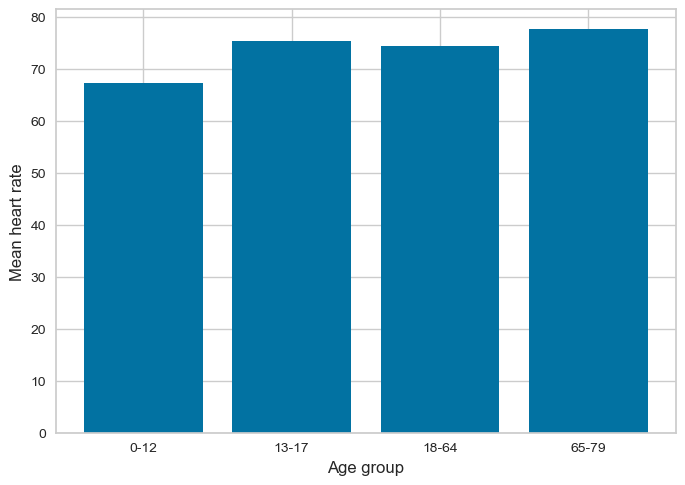

In [28]:
# Define age intervals
age_groups = [(0, 12), (13, 17), (18, 64), (65, 79)]

# Calculate mean heart rate for each age group
mean_heart_rate = []
for age_group in age_groups:
    age_filter = (result['Age'] >= age_group[0]) & (cleaned_data['Age'] <= age_group[1])
    mean_hr = result.loc[age_filter, 'HeartRate'].mean()
    mean_heart_rate.append(mean_hr)

# Plot mean heart rate by age group
plt.bar(range(len(age_groups)), mean_heart_rate)
plt.xticks(range(len(age_groups)), ['{}-{}'.format(ag[0], ag[1]) for ag in age_groups])
plt.xlabel('Age group')
plt.ylabel('Mean heart rate')
plt.show()

In [29]:
# instantiating an age classification list to create age intervals
age_grp = ['0-12','13-17','18-64','65 and above']
ranges = [0,12,18,64,100]
# creating the age intervals using.cut() function
df['Age_interval'] = pd.cut(df['Age'], bins=ranges, labels=age_grp,include_lowest=True)
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_interval
0,25,130,80,15.0,98.0,86,high risk,18-64
1,35,140,90,13.0,98.0,70,high risk,18-64
2,29,90,70,8.0,100.0,80,high risk,18-64
3,30,140,85,7.0,98.0,70,high risk,18-64
4,35,120,60,6.1,98.0,76,low risk,18-64
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,18-64
1010,55,120,90,18.0,98.0,60,high risk,18-64
1011,35,85,60,19.0,98.0,86,high risk,18-64
1012,43,120,90,18.0,98.0,70,high risk,18-64


In [30]:
# performing heart rate grouping per age interval
age_group_heartrate = df.groupby(['Age_interval'])['HeartRate'].describe()

# reseting the index to ensure Age interval is a column in the dataframe to make it easy for plotting
age_group_heartrate.reset_index(inplace=True)

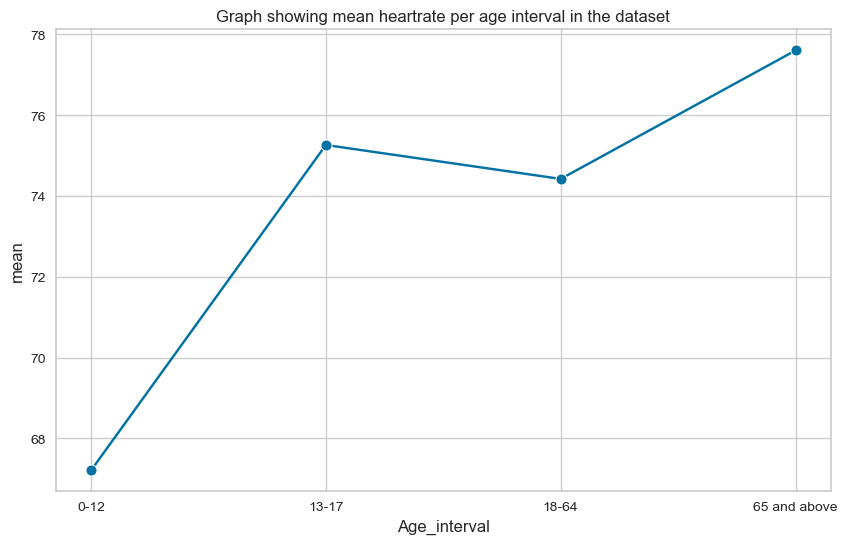

In [31]:
# setting the plot figure size
plt.figure(figsize=(10,6)) 

# instantiating the plot function and its title using .set()
heart_rate_plt = sns.lineplot(data=age_group_heartrate, x='Age_interval', y='mean', marker='o', 
                              markersize=8).set_title('Graph showing mean heartrate per age interval in the dataset')

heart_rate_plt.get_figure().savefig('Heart rate plot.png') # saving the plot

# Question 4

In [32]:
# creating a function to iterate through the blood presure columns and label it
def blood_pressure_label(df,column):
        a = np.array([]) # instantiating an array to fill i the labels generated
        if column == 'SystolicBP':
            for i in df[column]: # iterating through the specified column to label the values identified
                if i < 110:
                    a = np.append(a,'low')
                elif i in range(110,140):
                    a = np.append(a,'normal')
                elif i > 139:
                    a = np.append(a,'high')
        elif column == 'DiastolicBP':
            for i in df[column]:
                if i < 70:
                    a = np.append(a,'low')
                elif i in range(70,90):
                    a = np.append(a,'normal')
                elif i > 89:
                    a = np.append(a,'high')
        return a

In [33]:
# creating new columns to house the labelled blood pressure values
df['SystolicBP_label'] = blood_pressure_label(result, 'SystolicBP')
df['DiastolicBP_label'] = blood_pressure_label(result, 'DiastolicBP')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,Age_interval,SystolicBP_label,DiastolicBP_label
0,25,130,80,15.0,98.0,86,high risk,18-64,normal,normal
1,35,140,90,13.0,98.0,70,high risk,18-64,high,high
2,29,90,70,8.0,100.0,80,high risk,18-64,low,normal
3,30,140,85,7.0,98.0,70,high risk,18-64,high,normal
4,35,120,60,6.1,98.0,76,low risk,18-64,normal,low
...,...,...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,18-64,normal,low
1010,55,120,90,18.0,98.0,60,high risk,18-64,normal,high
1011,35,85,60,19.0,98.0,86,high risk,18-64,low,low
1012,43,120,90,18.0,98.0,70,high risk,18-64,normal,high


In [34]:
# one hot encoding blod pressure labelle columns in preparation for association rules mining
systolic_bp = pd.get_dummies(df.SystolicBP_label, prefix='SystolicBP')
diastolic_bp = pd.get_dummies(df.DiastolicBP_label, prefix='DiastolicBP')

# creating a dataframe of the one hot encoded varaibles
new_df = pd.concat([systolic_bp, diastolic_bp], axis=1)
new_df

,SystolicBP_high,SystolicBP_low,SystolicBP_normal,DiastolicBP_high,DiastolicBP_low,DiastolicBP_normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


In [35]:
# one hot encoding blod pressure labelle columns in preparation for association rules mining
systolic_bp = pd.get_dummies(df.SystolicBP_label, prefix='SystolicBP')
diastolic_bp = pd.get_dummies(df.DiastolicBP_label, prefix='DiastolicBP')

# creating a dataframe of the one hot encoded varaibles
new_df = pd.concat([systolic_bp, diastolic_bp], axis=1)
new_df

,SystolicBP_high,SystolicBP_low,SystolicBP_normal,DiastolicBP_high,DiastolicBP_low,DiastolicBP_normal
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,1,0,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
1009,0,0,1,0,1,0
1010,0,0,1,1,0,0
1011,0,1,0,0,1,0
1012,0,0,1,1,0,0


In [36]:
freq_itemset = apriori(new_df,min_support=0.1, use_colnames=True)
freq_itemset

C:\Users\USER PC\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.128205,(SystolicBP_high)
1,0.339250,(SystolicBP_low)
2,0.532544,(SystolicBP_normal)
3,0.272189,(DiastolicBP_high)
4,0.316568,(DiastolicBP_low)
5,0.411243,(DiastolicBP_normal)
6,0.115385,"(DiastolicBP_high, SystolicBP_high)"
7,0.266272,"(DiastolicBP_low, SystolicBP_low)"
8,0.146943,"(SystolicBP_normal, DiastolicBP_high)"
9,0.335306,"(SystolicBP_normal, DiastolicBP_normal)"


In [37]:
# creating and finding best cardinal=2 rules for the dataset baove
rules_2 = association_rules(freq_itemset, metric='lift', min_threshold=0.5)
rules_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DiastolicBP_high),(SystolicBP_high),0.272189,0.128205,0.115385,0.423913,3.306522,0.080489,1.513304,0.958446
1,(SystolicBP_high),(DiastolicBP_high),0.128205,0.272189,0.115385,0.900000,3.306522,0.080489,7.278107,0.800151
2,(DiastolicBP_low),(SystolicBP_low),0.316568,0.339250,0.266272,0.841121,2.479352,0.158876,4.158835,0.873048
3,(SystolicBP_low),(DiastolicBP_low),0.339250,0.316568,0.266272,0.784884,2.479352,0.158876,3.177035,0.903018
4,(SystolicBP_normal),(DiastolicBP_high),0.532544,0.272189,0.146943,0.275926,1.013728,0.001990,1.005160,0.028970
5,(DiastolicBP_high),(SystolicBP_normal),0.272189,0.532544,0.146943,0.539855,1.013728,0.001990,1.015888,0.018606
6,(SystolicBP_normal),(DiastolicBP_normal),0.532544,0.411243,0.335306,0.629630,1.531042,0.116301,1.589645,0.741996
7,(DiastolicBP_normal),(SystolicBP_normal),0.411243,0.532544,0.335306,0.815348,1.531042,0.116301,2.531545,0.589122


In [81]:
# create a function to categorize blood pressure readings
def categorize_bp(row):
    if row['SystolicBP'] >= 140 and row['DiastolicBP'] >= 90:
        return 'high/high'
    elif 110 <= row['SystolicBP'] < 140 and 70 <= row['DiastolicBP'] < 90:
        return 'normal/normal'
    elif row['SystolicBP'] < 110 and row['DiastolicBP'] < 70:
        return 'low/low'
    else:
        return 'other'

# Question 5

In [39]:
# creating the features to use to build the clustering model
features = df[['Age','SystolicBP']]
features

,Age,SystolicBP
0,25,130
1,35,140
2,29,90
3,30,140
4,35,120
...,...,...
1009,22,120
1010,55,120
1011,35,85
1012,43,120


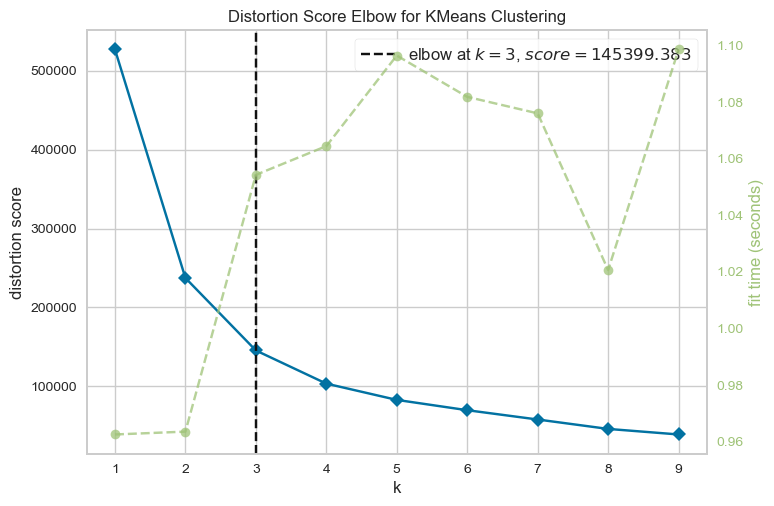

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
# Instantiate a kelbow visualizer to try and find optimal no of clusters for the model
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10), metric='distortion', timings=True, locate_elbow=True)
 
visualizer.fit(features)        # Fit the data to the visualizer
visualizer.show()

In [41]:
'''creating a function to build a specific no of cluster model, calcuate the centroids,
graphically show the clusters, its centroids and save the plot while also returning the silhouette score'''

def cluster_plot(n,features, x_label, y_label, label):
    k_means = KMeans(n_clusters=n)
    k_means.fit(features)  
    labels = k_means.fit_predict(features)
    
    # adding the labels into the dataframe for plotting
    features[label] = labels
    
    # plotting using seaborn and saving the plot
    plot = sns.scatterplot(data = features, x = x_label, y = y_label, hue = label, 
                         palette = 'pastel')
    plt.title('Graph showing Patients Clusters with similar Systolic BP')
    save_plot = plot.get_figure().savefig('Systolic BP cluster plot.png') # saving the plot
    return (plot, save_plot, f'Silhouette score is: {silhouette_score(features, labels)}')

(<Axes: title={'center': 'Graph showing Patients Clusters with similar Systolic BP'}, xlabel='SystolicBP', ylabel='Age'>,
 None,
 'Silhouette score is: 0.5208842067446019')

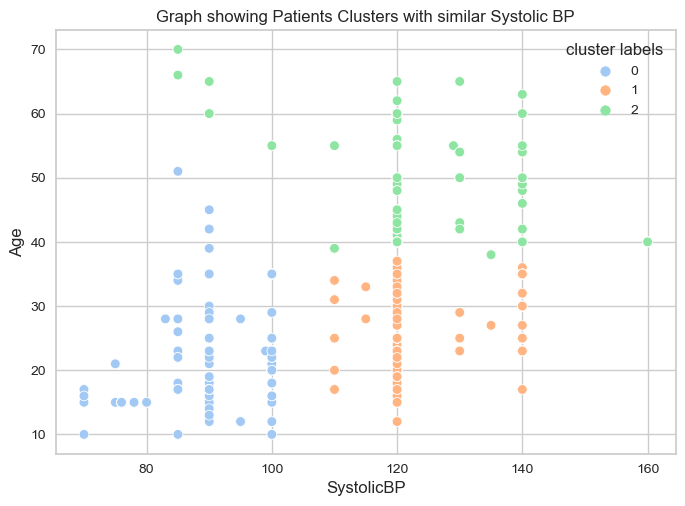

In [42]:
# calling out the created funcion above
cluster_plot(3,features,'SystolicBP','Age','cluster labels')

# Question 6

In [43]:
x = df['Age']
y = df['SystolicBP']

correlation = x.corr(y)
print (f'Correlation between Age and SystolicBP: {correlation}')

Correlation between Age and SystolicBP: 0.4160454479747333


In [55]:
from scipy.stats import pearsonr

values = pearsonr(x,y)
corr = values [0]
pvalue = values [1]

print('',corr)
print('pvalues', pvalue)


 0.416045447974733
pvalues 1.0255027752599545e-43


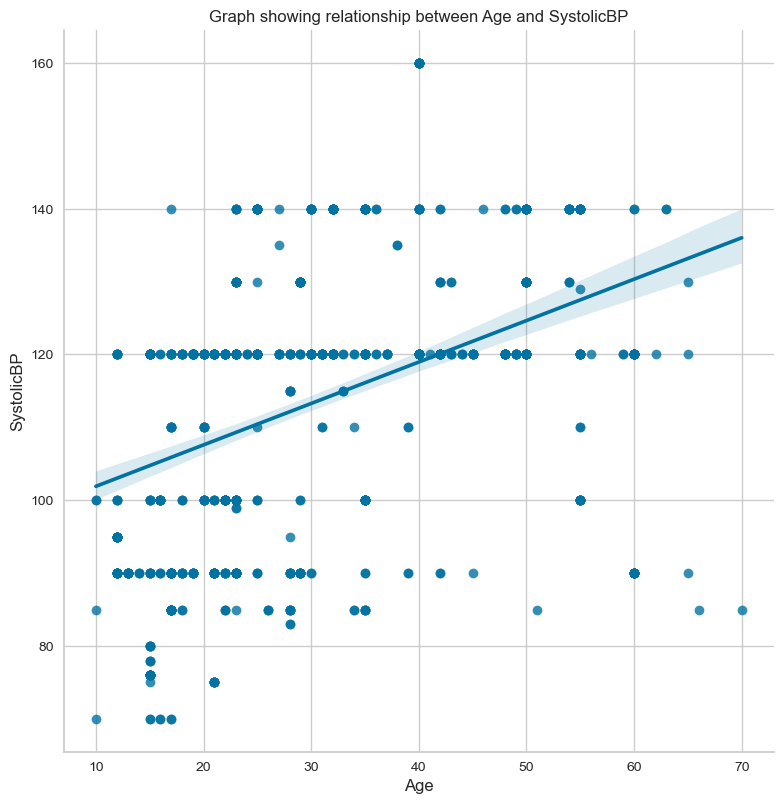

In [44]:
# graphically showing how Age and SystolicBP relate with eachother from the dataset 
sys_plt = sns.lmplot(data=df, x='Age', y='SystolicBP', 
                     height=8, aspect=1).set(title ='Graph showing relationship between Age and SystolicBP')
sys_plt.savefig('Systolic plot')